#Problème 3




# importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur

#définir les constantes du problème

In [0]:
k1=0.25  #  mol/(l*min)
k2= 0.1 # mol/(l*min)
k3 = 5.0 # l/mol*min
CA0= 1.5  # mol/l
CB0 =2.0# mol/l
Debit_V = 10 # l/min


#définir les équations à résoudre

In [0]:
def equations(variables,V,k1,k2,k3,Debit_V): # le premier paramètre est un vecteur qui exprime la variable dépendante, le deuxième paramètre est la variable indépendante, on rajoute les constantes qu'on utilise dans les équations
  FA,FB,FC,FD,FE,FF=variables 
  
  CA=FA/Debit_V
  CB=FB/Debit_V
  CC=FC/Debit_V
  CD=FD/Debit_V
  CE=FE/Debit_V
  CF=FF/Debit_V
  
  r1=k1*CA*CB
  r2=k2*CA*CD
  r3=k3*CB*CB*CC
  
  RA=-r1-(3*r2)
  RB=-(2*r1)-r3
  RC=r1+r2-(2*r3)
  RD=r1-(2*r2)+r3
  RE=r2
  RF=r3
  
  dFAdV= RA
  dFBdV= RB
  dFCdV= RC
  dFDdV= RD
  dFEdV= RE
  dFFdV= RF
 
  return dFAdV, dFBdV, dFCdV, dFDdV, dFEdV, dFFdV # retourner la valeur DES DERIVEES au solveur, on met toujours les variables dans le même ordre, on les sépare par une virgule

# définir les conditions intiales

In [0]:
conditions_initiales = [CA0*Debit_V,CB0*Debit_V,0,0,0,0] # il est important de respecter l'ordre !!!

# Resoudre le problème à l'aide du solveur

In [0]:
V = np.linspace (0,50) # (définir les bornes d'intégration) arange donne l'intervalle entre les valeurs souhaitées !!! linspace donne le nombre de point voulu
résultats = solveur.odeint(equations,conditions_initiales,V,(k1,k2,k3,Debit_V)) #nom de l'équation, conditions intitales, bornes d'integration, (constante1,)il faut mettre la virgule même s'il n'y a qu'une seule constante

In [0]:
FA=résultats[:,0]
FC=résultats[:,2]

In [0]:
FA0=CA0*Debit_V
X=(FA0-FA)/FA0

# visualiser les résultats

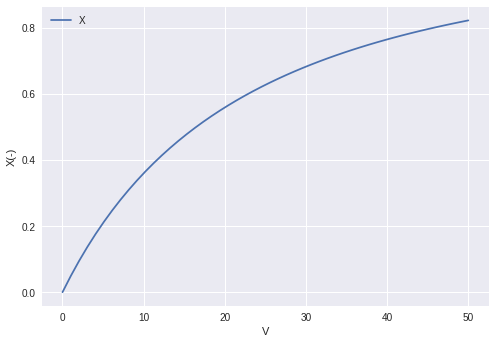

In [64]:

plt.plot(V,X)
plt.xlabel("V")
plt.ylabel("X(-)")
plt.legend(['X']) 
plt.show()

In [65]:
X[V>=50][0] 

0.8227065794882165

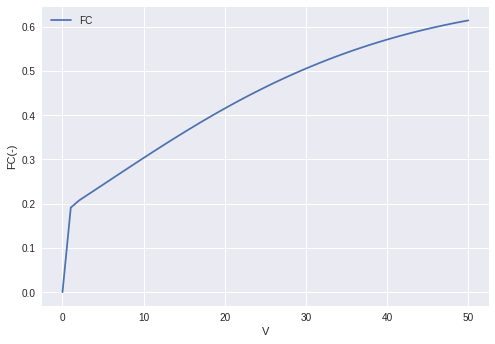

In [69]:
plt.plot(V,FC)
plt.xlabel("V")
plt.ylabel("FC")
plt.legend(['FC']) 
plt.show()

In [70]:
FC[V>=50][0]

0.6142216961327225

In [74]:
CC=(FC[V>=50][0])/Debit_V
CC

0.06142216961327225